In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

In [114]:
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'
casp_protein_id = 'T1027'   # 6ya2
proteins = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']

da = DihedralAdherence(proteins[0], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], 
                       mode='kde_af')
# da.test_pdbmine_conn()
# da.compute_structures(replace=False)
# da.query_pdbmine()

# da.load_results()
# da.plot_da_for_seq('YGWPVCY')
# da.compute_das(replace=True)
da.load_results_da()
# both = da.plot_res_vs_da(pred_id=da.alphafold_id)
# da.plot_heatmap()
# da.plot_da_vs_rmsd_simple()
# print(da.grouped_preds[da.grouped_preds.protein_id==da.get_id('337_5')].RMS_CA)
# rmsds, n, rmsd_inner = da.split_and_compute_rmsd(pred_id=da.get_id('337_5'), split=[(298, 311), (327,340)])

Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 


Highest DA Differences:

|   pos |   pos_xray | seq_ctxt   |   da_pred |   da_xray |   da_diff |
|------:|-----------:|:-----------|----------:|----------:|----------:|
|     7 |          7 | WNLDKNL    |   177.12  |   6.03352 |   171.086 |
|   396 |        383 | LVLVAVN    |   189.616 |  19.8634  |   169.753 |
|    43 |         43 | GSAITGI    |   169.658 |   8.12238 |   161.536 |
|    41 |         41 | YLGSAIT    |   187.575 |  32.0795  |   155.495 |
|   339 |        326 | LGADLMN    |   149.604 |   2.56301 |   147.041 |
|   207 |        200 | FQAYKTV    |   160.412 |  16.8534  |   143.559 |
|   340 |        327 | GADLMNP    |   175.008 |  31.4574  |   143.55  |
|   189 |        189 | MTETFKP    |   194.271 |  53.1887  |   141.082 |
|   160 |        160 | AWLFRPA    |   152.319 |  14.7352  |   137.584 |
|   397 |        384 | VLVAVNR    |   143.749 |  16.8045  |   126.945 |


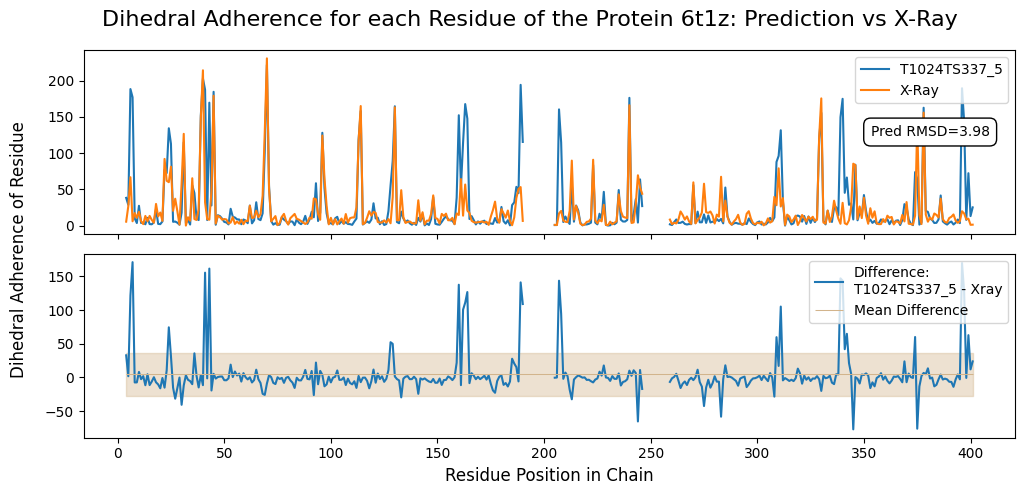

,pos,seq_ctxt,res,phi,psi,protein_id,da_pred,n_samples,da_no_scale,da_na,pos_xray,da_xray,da_diff
66,70,DRNGRKP,G,-133.877512,178.355525,T1024TS337_5,221.786990,2485.0,221.786990,False,70.0,230.827008,-9.040018
36,40,QYLGSAI,G,-81.655059,151.543091,T1024TS337_5,202.988356,6766.0,202.988356,False,40.0,214.356908,-11.368552
41,45,AITGILL,G,-59.589047,-40.921221,T1024TS337_5,184.656721,4989.0,184.656721,False,45.0,179.221774,5.434947
326,330,IVYTPSV,T,-62.220700,-47.388122,T1024TS337_5,155.680908,2058.0,155.680908,False,317.0,175.576529,-19.895621
236,240,LPVHLSN,H,-60.616165,-44.750955,T1024TS337_5,176.342988,2910.0,176.342988,False,233.0,166.153143,10.189845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
da.plot_res_vs_da().sort_values('da_xray', ascending=False)

In [132]:
da.xray_phi_psi[da.xray_phi_psi.seq_ctxt == 'AITGILL']

,pos,seq_ctxt,res,phi,psi,protein_id,da,n_samples,da_no_scale
42,45,AITGILL,G,-61.094693,-47.547192,6t1z,179.221774,4989.0,179.221774


[1.0, 6.0, 7.0, 8.0] 4989.0
(2710, 5)
	KDEPEAK: Using kdepeak of cluster
[179.22177439]
[179.22483424]
               phi          psi       weight      winsize
count  2710.000000  2710.000000  2710.000000  2710.000000
mean    -17.569114    -0.880738     7.870480     4.219557
std     110.579990   109.962215    17.185196     0.547609
min    -179.800000  -180.000000     1.000000     4.000000
25%    -105.675000   -48.375000     1.000000     4.000000
50%     -60.450000   -18.200000     1.000000     4.000000
75%      82.575000   130.675000     1.000000     4.000000
max     179.900000   179.700000    64.000000     6.000000
Residue G of Window AITGILL centered at 45 of AITGILL
	Win 4: TGIL - 2289 samples
	Win 5: ITGIL - 247 samples
	Win 6: ITGILL - 174 samples
	Win 7: AITGILL - 0 samples
	KDEPEAK: Using kdepeak of cluster
Ideal:	 (160.95, -161.95)
X-ray[45]:	 (-61.09, -47.55), DA=179.22
TS427_1[45]:	 (-62.08, -35.33), DA=186.53
AlphaFold[45]:	 (-62.08, -35.33), DA=186.53
Other Predictions DA:

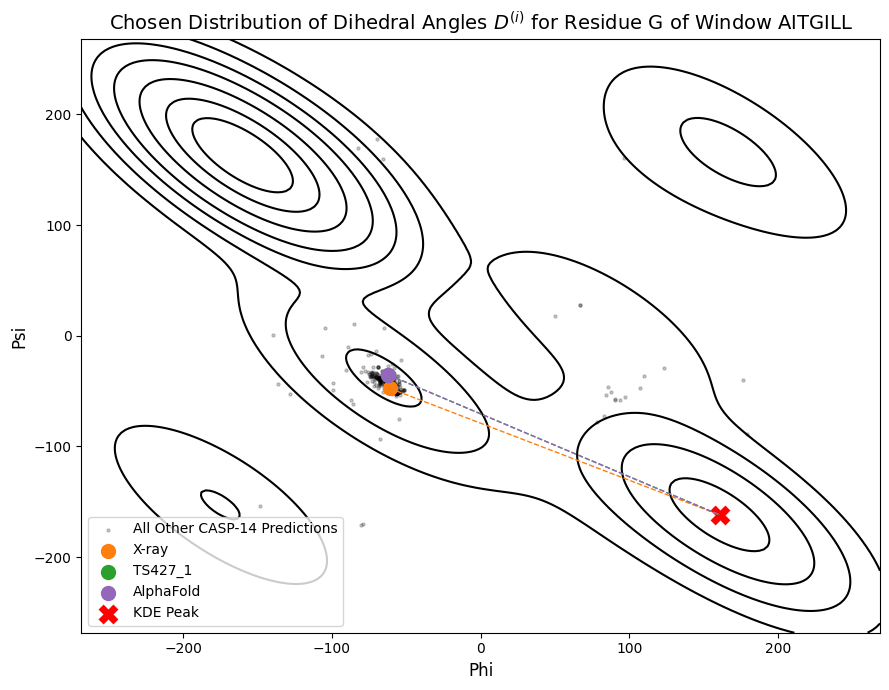

In [133]:
from lib.utils import calc_da_for_one, calc_da, find_kdepeak_af, get_phi_psi_dist, find_kdepeak
import math
seq = 'AITGILL'
phi_psi_dist, info = get_phi_psi_dist(da.queries, seq)
da_scale = [math.log2(i)+1 for i in da.kdews]
weighted_n_samples = sum([i[2]*w for i,w in zip(info, da_scale)])
print(da_scale, weighted_n_samples)
print(phi_psi_dist.shape)
af = da.phi_psi_predictions[(da.phi_psi_predictions.protein_id == da.alphafold_id) & (da.phi_psi_predictions.seq_ctxt == seq)]
target, kdepeak, cluster_peaks = find_kdepeak_af(phi_psi_dist, None, af, return_peaks=True)
print(calc_da(target.values, da.xray_phi_psi.loc[da.xray_phi_psi.seq_ctxt == seq, ['phi','psi']].values))
target = find_kdepeak(phi_psi_dist, None)
print(calc_da(target.values, da.xray_phi_psi.loc[da.xray_phi_psi.seq_ctxt == seq, ['phi','psi']].values))
da.plot_da_for_seq(seq, pred_id=da.alphafold_id)

	KDEPEAK: Using kdepeak of cluster


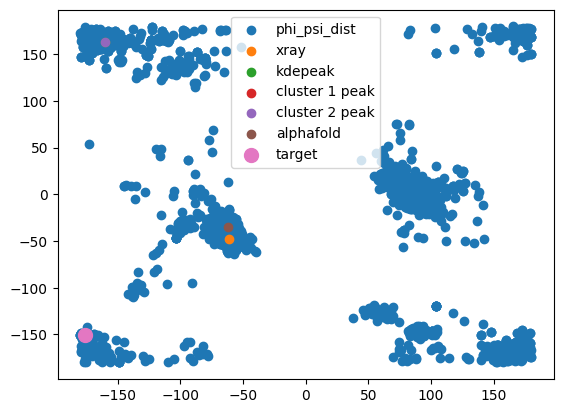

In [134]:
# da.plot_da_for_seq(seq)
from lib.utils import find_kdepeak_af, get_phi_psi_dist
phi_psi_dist, _ = get_phi_psi_dist(da.queries, seq)
af = da.phi_psi_predictions[(da.phi_psi_predictions.protein_id == da.alphafold_id) & (da.phi_psi_predictions.seq_ctxt == seq)]
xray = da.xray_phi_psi[da.xray_phi_psi.seq_ctxt == seq]
target, kdepeak, cluster_peaks = find_kdepeak_af(phi_psi_dist, None, af, return_peaks=True)
plt.scatter(phi_psi_dist.phi, phi_psi_dist.psi, label='phi_psi_dist')
plt.scatter(xray.phi, xray.psi, label='xray')
plt.scatter(kdepeak.phi, kdepeak.psi, label='kdepeak')
plt.scatter(cluster_peaks[0].phi, cluster_peaks[0].psi, label='cluster 1 peak')
plt.scatter(cluster_peaks[1].phi, cluster_peaks[1].psi, label='cluster 2 peak')
plt.scatter(af.phi, af.psi, label='alphafold')
plt.scatter(target.phi, target.psi, label='target', s=100)
plt.legend()
plt.show()

In [3]:
for casp_id in ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']:
    try:
        da = DihedralAdherence(casp_id, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, kdews=[1,32,64,128], mode='kde')
        # da.query_pdbmine()
        # da.compute_structures(replace=False)
        da.load_results()
        da.compute_das(replace=True)
    except Exception as e:
        print(f"{casp_id} - Error: {e}")

Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
0/393: GKEFWNL
	Win 4: EFWN - 201 samples
	Win 5: KEFWN - 56 samples
	Win 6: KEFWNL - 0 samples
	Win 7: GKEFWNL - 0 samples
	Weighted n samples: 537.0
	0 predictions
No predictions seq GKEFWNL
1/393: KEFWNLD
	Win 4: FWNL - 350 samples
	Win 5: EFWNL - 19 samples
	Win 6: EFWNLD - 0 samples
	Win 7: KEFWNLD - 0 samples
	Weighted n samples: 464.0
	484 predictions
2/393: EFWNLDK
	Win 4: WNLD - 260 samples
	Win 5: FWNLD - 8 samples
	Win 6: FWNLDK - 0 samples
	Win 7: EFWNLDK - 0 samples
	Weighted n samples: 308.0
	484 predictions
3/393: FWNLDKN
	Win 4: NLDK - 2339 samples
	Win 5: WNLDK - 23 samples
	Win 6: WNLDKN - 0 samples
	Win 7: FWNLDKN - 0 samples
	Weighted n samples: 2477.0
	484 predictions
4/393: WNLDKNL
	Win 4: LDKN - 2174 samples
	Win 5: NLDKN - 39 samples
	Win 6: NLDKNL - 8 samples
	Win 7: WNLDKNL - 0 samples
	Weighted n samples: 2464.0
	484 predictions
5/393: NLDKNLQ
	Win 4: DKNL - 2907 samples
	Win

In [ ]:
from lib.fit_model_on_multiple import fit_lr, plot_md_vs_rmsd
import os
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'tests'

# model, grouped_preds = fit_model_on_multiple(['T1056', 'T1038', 'T1025', 'T1028'], WINDOW_SIZE, WINDOW_SIZE_CONTEXT, PDBMINE_URL, n_comp=2000)
model, grouped_preds = fit_lr(
    ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025'],
    # ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028'],
    [4,5,6,7], [1,32,64,128],
    PDBMINE_URL, PROJECT_DIR,
    n_comp=2000,
)
plot_md_vs_rmsd(grouped_preds, axlims=((0,60), (0,80)))